# Read and take a look at the the datafile

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_calendar = pd.read_csv('./calendar.csv')
df_listing = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')

In [2]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# How many Airbnb lists and hosts are in the Seattle area 

In [5]:
list_num = df_calendar.listing_id.nunique()
host_num = df_listing['host_id'].nunique()
print(list_num, host_num)

3818 2751


# Clean the data from df_calendar

In [2]:
#for the price column, drop NaN values
df_calendar = df_calendar.dropna(subset=['price'])

# drop the $ sign and coma from the price column and then convert the data into numerical values 

def clean_price_data (df, col_price):
    '''
    INPUT
    df - pandas DataFrame
    col_price - the column that contains price information
    
    OUTPUT
    df - cleaned dataset with data in col_price column changed to numerical values 

    '''
    df[col_price] = pd.to_numeric(df[col_price].apply(lambda x: str(x).replace('$','').replace(',','')),errors='coerce')
    return df

clean_price_data(df_calendar, 'price')

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


In [3]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


# Average price by date

Text(0.5, 0, 'Dates')

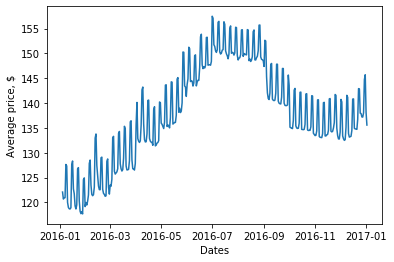

In [8]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
plt.plot(df_calendar.groupby('date')['price'].mean())
plt.ylabel('Average price, $')
plt.xlabel('Dates')

# Average price by month

Text(0.5, 0, 'Month')

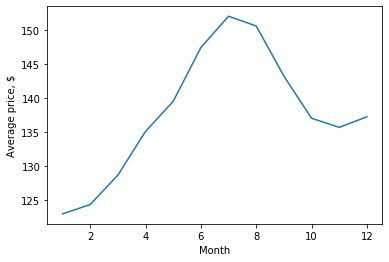

In [9]:
df_calendar['month'] = df_calendar['date'].dt.month
plt.plot(df_calendar.groupby(['month'])['price'].mean())
plt.ylabel('Average price, $')
plt.xlabel('Month')

# Average price by weekdays

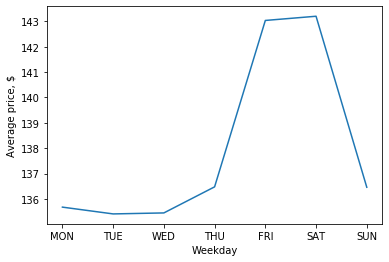

In [10]:
import calendar
df_calendar['weekday'] = df_calendar['date'].dt.weekday
plt.plot(df_calendar.groupby(['weekday'])['price'].mean())
weekday_map= ['MON','TUE', 'WED','THU','FRI','SAT','SUN']
plt.ylabel('Average price, $')
plt.xlabel('Weekday')
plt.xticks(np.arange(7),weekday_map);

# Number of available listings by month

Text(0.5, 0, 'Month')

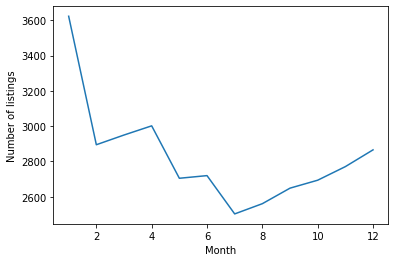

In [11]:

plt.plot(df_calendar.groupby('month')['listing_id'].nunique())
plt.ylabel('Number of listings')
plt.xlabel('Month')

In [12]:
#Convert t in column 'available' to 1 
df_calendar['available'] = df_calendar['available'].apply(lambda x: 1 if x == 't' else x)


# Average listing prices 

Text(0.5, 0, 'Price, $')

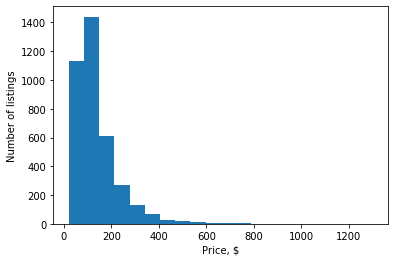

In [3]:
plt.hist(df_calendar.groupby('listing_id')['price'].mean(),bins=20)
plt.ylabel('Number of listings')
plt.xlabel('Price, $')

In [31]:
# what percentage list price lower than $150/night
(df_calendar.groupby('listing_id')['price'].mean()<150).mean()

0.6975557346226162

# Take a look at the list decriptions word cloud

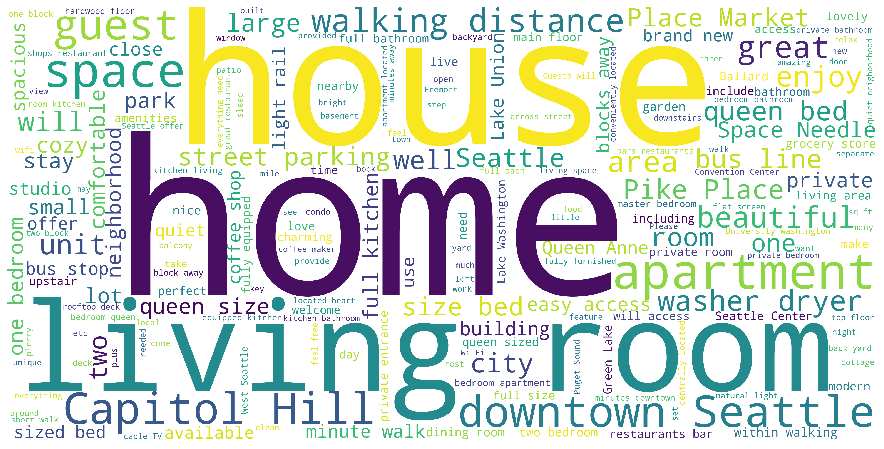

In [9]:
from wordcloud import WordCloud, STOPWORDS
description = ' '.join(df_listing['description'])
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()


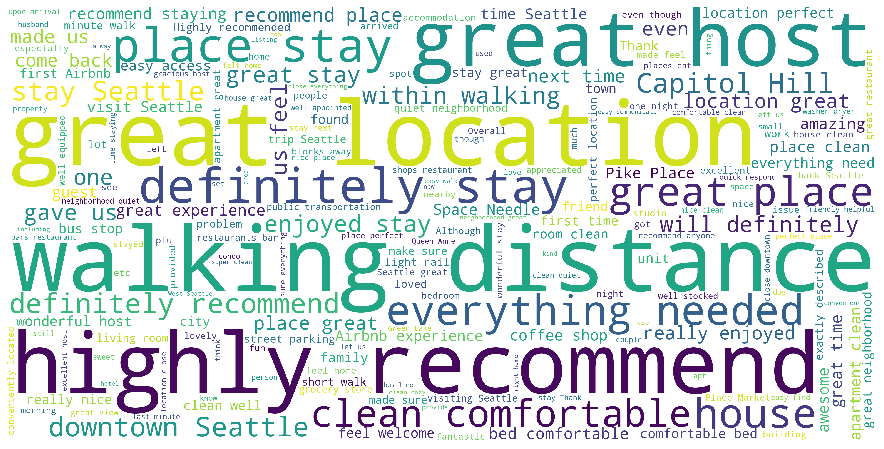

In [8]:
# word cloud for most used words in guest comments 
df_reviews = df_reviews.dropna(subset=['comments'])
reviews = ' '.join(df_reviews['comments'])
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(reviews)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

# Clean the data from df_listing

column= [['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']

In [14]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [33]:
#remove rows where price is NaN
df_listing = df_listing.dropna(subset=['price'])

# Rename the column id to listing_id to keep consistant with df_calendar
df_listing = df_listing.rename(columns = {'id':'listing_id'})

# drop the $ sign and coma from all columns associated with price and then convert the data into numerical values 
price_col = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']

for col in price_col:
    clean_price_data(df_listing, col)


# Fill in some missing values #
def fillna_with_mode (df, col):
    '''
    INPUT
    dataframe
    column 
    
    OUTPUT
    column - with NaN filled by mode
    '''
    df[col] = df[col].fillna(df[col].mode().iloc[0])
    return df[col]

#fill in missing values for bathrooms, bedrooms and beds with mode
col_fill_mode = ['bathrooms','bedrooms','beds','host_listings_count']

for col in col_fill_mode:
    fillna_with_mode(df_listing, col)


def fillna_with_mean (df, col):
    '''
    INPUT
    dataframe
    column 
    
    OUTPUT
    column - with NaN filled by mean
    '''
    df[col] = df[col].fillna(df[col].mean())
    return df[col]

col_reviews = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value','reviews_per_month']

for col in col_reviews:
    fillna_with_mean(df_listing,col)

In [34]:
# Change property type to major types or other
major_property = ['House','Apartment','Townhouse','Condominium','Loft','Bed & Breakfast']

def encode_property (property_type):
    if property_type not in major_property:
        return 'Other'
    return property_type

df_listing['property_type'] = df_listing['property_type'].apply(encode_property)

#replace t and f in columns to True and False:
def t_to_true (var):
    if var == 't':
        return True
    if var == 'f':
        return False 
    
t_or_f_col = ['host_has_profile_pic','host_identity_verified','instant_bookable',
              'is_location_exact','require_guest_profile_picture','require_guest_phone_verification']
for col in t_or_f_col:
    df_listing[col] = df_listing[col].apply(t_to_true)
    
# Change 'host_since' column dtype from object to datetime, and only save years
df_listing['host_since'] = pd.to_datetime(df_listing['host_since'])
df_listing['host_since'] = df_listing['host_since'].dt.year
fillna_with_mean(df_listing, 'host_since')

#convert 'host_response_rate' into number
df_listing['host_response_rate'] = pd.to_numeric(df_listing['host_response_rate'].apply(lambda x: str(x).replace('%','')),errors='coerce')
fillna_with_mean(df_listing, 'host_response_rate')

# change'extra_people' column to True if charged and False otherwise
def if_charge (extra_charge):
    if extra_charge == 0:
        return False
    else:
        return True
df_listing['extra_people'] = df_listing['extra_people'].apply(if_charge)

In [35]:
# Preprocess 'amenities' column: extract features from 'amenities' column, and replace True and False for each feature

#replace empty {} with ''
df_listing.loc[df_listing['amenities'] == '{}','amenities']=''

#Remove the symbols and split the list by ','
df_listing['amenities'] = df_listing['amenities'].apply(lambda x: set(x.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')))


# Get a set of all items in amentities 
all_amenities = set()
for i in range(len(df_listing)):
    items = df_listing.loc[i, 'amenities']
    all_amenities = all_amenities.union(set(items))

 all_amenities = {'',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet'}

### For items in amentities list, since there are so many potential predictors, I chose a few amenities such as internet that I think are more vital that amentities such as having an iron. Of course, customers have different preferences. This is a demo to show that I can convey the amentities list into single feature columns and use them for predictions. 

In [36]:
# Choose some items in amenities that are used to predict prices
amenities_pred = ['Internet','Kitchen','Free Parking on Premises','Family/Kid Friendly','Washer / Dryer','Wheelchair Accessible']

#Add new boolean columns for amenities features that are used to predict prices 
for item in amenities_pred:
    df_listing[item] = df_listing['amenities'].apply(lambda x: item in x)

# Price correlation with some selected numerical columns

### For categorial features: 1) I removed all the features that are absolutely irrelavant for predicting the prices, such as id, and different url.  2) For similar features related to each other, I chose one among them. For example, I chose  'neighborhood_group_cleansed' over other features relating to geographical information. 3) I also removed features that have more than 80% of missing values such as square_foot. 

In [8]:
#Select factors for predicting prices 

pred_cols = ['host_since', 'host_is_superhost','host_identity_verified',
        'host_has_profile_pic','market', 'property_type', 'neighbourhood_group_cleansed',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'guests_included','minimum_nights',
       'extra_people', 'number_of_reviews', 'require_guest_profile_picture', 'require_guest_phone_verification',
       'review_scores_rating', 'instant_bookable', 'cancellation_policy','reviews_per_month'] + amenities_pred
df_listing = df_listing[pred_cols]

,host_since,host_is_superhost,host_identity_verified,host_has_profile_pic,market,property_type,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,...,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,Internet,Kitchen,Free Parking on Premises,Family/Kid Friendly,Washer / Dryer,Wheelchair Accessible
0,2011.0,f,True,True,Seattle,Apartment,Queen Anne,Entire home/apt,4,1.0,...,95.000000,False,moderate,4.070000,True,True,False,True,False,False
1,2013.0,t,True,True,Seattle,Apartment,Queen Anne,Entire home/apt,4,1.0,...,96.000000,False,strict,1.480000,True,True,True,True,False,False
2,2014.0,f,True,True,Seattle,House,Queen Anne,Entire home/apt,11,4.5,...,97.000000,False,strict,1.150000,True,True,True,True,False,False
3,2013.0,f,True,True,Seattle,Apartment,Queen Anne,Entire home/apt,3,1.0,...,94.539262,False,flexible,2.078919,True,True,False,True,False,False
4,2011.0,f,True,True,Seattle,House,Queen Anne,Entire home/apt,6,2.0,...,92.000000,False,strict,0.890000,True,True,False,True,False,False


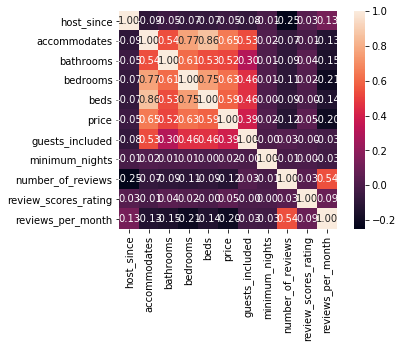

In [13]:
#Select numerical columns to find out correlations
num_col = df_listing.select_dtypes(include=['int64','float64'])

#Plot heatmap
df_map = num_col
sns.heatmap(df_map.corr(), square=True,annot=True, fmt = '.2f');

# Use machine learning to predict price correlations 

In [38]:

# Dummy the categorical variables
cat_vars = df_listing.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    df_listing = pd.concat([df_listing.drop(var, axis=1), pd.get_dummies(df_listing[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#Test and Train split data 
y = df_listing['price']
X = df_listing.drop(columns = 'price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.1, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train)

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 489.413, test: 3016.461
Random Forest R^2 train: 0.939, test: 0.662


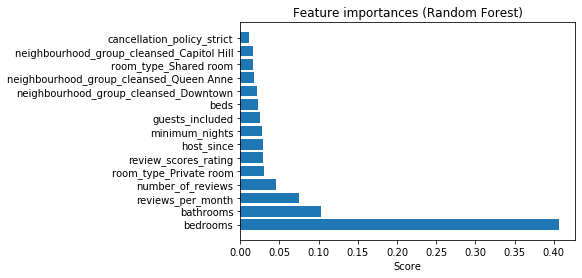

In [15]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1],reverse=True)
forest_feature_importances = pd.DataFrame(values, columns = headers)


features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.barh(y_pos,scores)
plt.yticks(y_pos, features)
plt.xlabel('Score')
plt.title('Feature importances (Random Forest)')
 
plt.show()

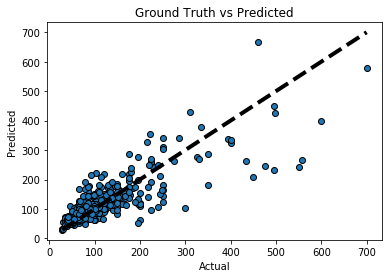

In [41]:

fig, ax = plt.subplots()

ax.scatter(y_test, y_test_preds, edgecolors=(0, 0, 0))

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Ground Truth vs Predicted")

plt.show()


#  Removing redundant features

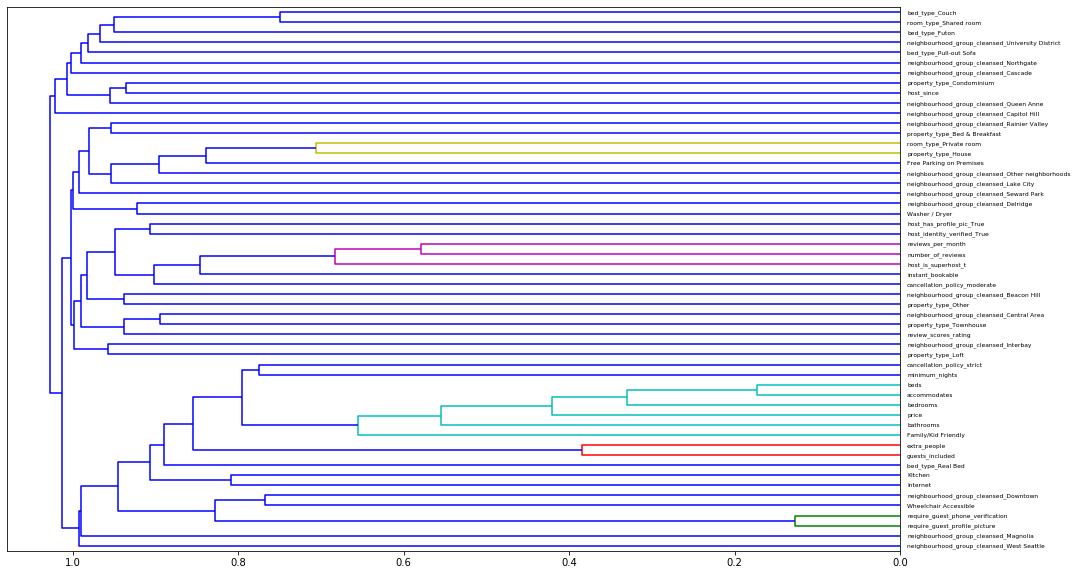

In [34]:
import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(df_listing).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z=hc.linkage(corr_condensed, method = 'average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=df_listing.columns,orientation='left')
plt.show()

In [37]:
# beds and accomodates are highly correlated 
# remove feature 'beds' and only keeps the the most important features and rerun the ML model

pred_cols = ['host_since', 'host_is_superhost',
         'property_type', 'neighbourhood_group_cleansed',
       'room_type', 'bathrooms', 'bedrooms',
       'accommodates', 'price', 'guests_included','minimum_nights',
       'extra_people', 'number_of_reviews', 
       'review_scores_rating', 'cancellation_policy','reviews_per_month'] + amenities_pred

df_listing = df_listing[pred_cols]

In [12]:
df_listing.head()

,host_since,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,extra_people,number_of_reviews,review_scores_rating,...,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
0,2011.0,1.0,1.0,1.0,85.0,2,1,True,207,95.000000,...,0,1,0,0,0,0,0,0,1,0
1,2013.0,1.0,1.0,1.0,150.0,1,2,False,43,96.000000,...,0,1,0,0,0,0,0,0,0,1
2,2014.0,4.5,5.0,7.0,975.0,10,4,True,20,97.000000,...,0,1,0,0,0,0,0,0,0,1
3,2013.0,1.0,0.0,2.0,100.0,1,1,False,0,94.539262,...,0,1,0,0,0,0,0,0,0,0
4,2011.0,2.0,3.0,3.0,450.0,6,1,True,38,92.000000,...,0,1,0,0,0,0,0,0,0,1
